In [1]:
import pandas as pd
from pathlib import Path
import spacy
import matplotlib.pyplot as plt

/Users/felixkempermann/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
Path('exports').mkdir(exist_ok=True)
nlp = spacy.load('de_core_news_sm')

In [3]:
def add_stop_list(df):
    if 'stop_words' not in df.columns:
        df['stop_words'] = False
    for _, row in df['words'].items():
        doc = nlp(row)
        for token in doc:
            if token.is_stop:
                df.at[_, 'stop_words'] = True

In [4]:
def first_five_nouns(df):
    counter = 0
    exp = []
    for _, row in df['words'].items():
        if counter >= 7:
            break

        doc = nlp(row)
        for token in doc:
            if token.pos_ == 'NOUN':
                exp.append(token.text)
                counter += 1
                if counter >= 7:
                    break
    return exp

In [5]:
test_df = pd.DataFrame({'words': ['Hund', 'gehen', 'schön', 'Haus', 'sein', 'Sucht', 'Flugzeug', 'Schiff', 'spielen', 'Bus', 'Auto', 'Fahrrad', 'Motorrad', 'Zug', 'U-Bahn'],
                        'amount': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]})

print(first_five_nouns(test_df))
add_stop_list(test_df)
test_df.head(5)

['Hund', 'Haus', 'Flugzeug', 'Schiff', 'Bus', 'Auto', 'Fahrrad']


,words,amount,stop_words
0,Hund,1,False
1,gehen,2,True
2,schön,3,False
3,Haus,4,False
4,sein,5,True


In [6]:
gpt4o_df        = pd.read_csv('exports/GPT4o-2025-01-06_15:01:12.csv')      # GPT4o
gpt35t_df       = pd.read_csv('exports/GPT35t-2025-01-06_15:01:12.csv')     # GPT35t 
perplexity_df   = pd.read_csv('exports/PERPLEXITY-2025-01-06_15:01:12.csv') # PERPLEXITY
claude_df       = pd.read_csv('exports/CLAUDE-2025-01-06_15:01:12.csv')     # CLAUDE
human_df        = pd.read_csv('exports/HUMAN-2025-01-06_15:01:12.csv')      # HUMAN

In [13]:
def calculate_average_word_length(df, word_column='words', amount_column='amount'):
    # Länge der Wörter berechnen
    df[word_column] = df[word_column].astype(str)
    df['word_length'] = df[word_column].apply(len)
    
    # Gewichtete Summe der Wortlängen berechnen
    weighted_sum = (df['word_length'] * df[amount_column]).sum()
    
    # Gesamtsumme der Häufigkeiten berechnen
    total_amount = df[amount_column].sum()
    
    # Durchschnittliche Wortlänge berechnen
    average_word_length = weighted_sum / total_amount if total_amount > 0 else 0
    
    return average_word_length

gpt4o_df.at

In [14]:
simple_statistics = pd.DataFrame({
    'index':                   [],
    'unique_words':            [], 
    'words_sum':               [],
    'normalised_unique_words': [],
    'absatz':                  [],
    'avg_absatz_length':       [],
    'avg_word_length':         [],
    '5most_common_words':      [],
    '5most_common_nouns':      []
})

In [15]:
gpt4o_stats         = [
    'GPT4o',
    len(gpt4o_df),
    gpt4o_df['amount'].sum(),
    len(gpt4o_df) / gpt4o_df['amount'].sum() * 10000,
    gpt4o_df.loc[gpt4o_df['words'] == '\n', 'amount'].sum() + gpt4o_df.loc[gpt4o_df['words'] == '\n\n', 'amount'].sum(),
    gpt4o_df['amount'].sum() / (gpt4o_df.loc[gpt4o_df['words'] == '\n', 'amount'].sum() + gpt4o_df.loc[gpt4o_df['words'] == '\n\n', 'amount'].sum()),
    calculate_average_word_length(gpt4o_df),
    gpt4o_df['words'].head(8).to_list(),
    first_five_nouns(gpt4o_df)
]

In [16]:
print(gpt4o_stats)

['GPT4o', 2054, np.int64(16386), np.float64(1253.5090931282803), np.int64(221), np.float64(74.1447963800905), np.float64(5.263700720126938), ['--', 'der', 'in', 'ein', 'und', 'sein', '\n\n', 'mit'], ['Spiel', 'Minute', 'Mannschaft', 'Verlängerung', 'Tor', 'Fußball', 'Team']]


In [17]:
gpt35t_stats        = [
    'GPT35t',
    len(gpt35t_df),
    gpt35t_df['amount'].sum(),
    len(gpt35t_df) / gpt35t_df['amount'].sum() * 10000,
    gpt35t_df.loc[gpt35t_df['words'] == '\n', 'amount'].sum() + gpt35t_df.loc[gpt35t_df['words'] == '\n\n', 'amount'].sum(),
    gpt35t_df['amount'].sum() / (gpt35t_df.loc[gpt35t_df['words'] == '\n', 'amount'].sum() + gpt35t_df.loc[gpt35t_df['words'] == '\n\n', 'amount'].sum()),
    calculate_average_word_length(gpt35t_df),
    gpt35t_df['words'].head(8).to_list(),
    first_five_nouns(gpt35t_df)
]

In [18]:
perplexity_stats    = [
    'PERPLEXITY',
    len(perplexity_df),
    perplexity_df['amount'].sum(),
    len(perplexity_df) / perplexity_df['amount'].sum() * 10000,
    perplexity_df.loc[perplexity_df['words'] == '\n', 'amount'].sum() + perplexity_df.loc[perplexity_df['words'] == '\n\n', 'amount'].sum(),
    perplexity_df['amount'].sum() / (perplexity_df.loc[perplexity_df['words'] == '\n', 'amount'].sum() + perplexity_df.loc[perplexity_df['words'] == '\n\n', 'amount'].sum()),
    calculate_average_word_length(perplexity_df),
    perplexity_df['words'].head(8).to_list(),
    first_five_nouns(perplexity_df)
]

In [19]:
claude_stats        = [
    'CLAUDE',
    len(claude_df),
    claude_df['amount'].sum(),
    len(claude_df) / claude_df['amount'].sum() * 10000,
    claude_df.loc[claude_df['words'] == '\n', 'amount'].sum() + claude_df.loc[claude_df['words'] == '\n\n', 'amount'].sum(),
    claude_df['amount'].sum() / (claude_df.loc[claude_df['words'] == '\n', 'amount'].sum() + claude_df.loc[claude_df['words'] == '\n\n', 'amount'].sum()),
    calculate_average_word_length(claude_df),
    claude_df['words'].head(8).to_list(),
    first_five_nouns(claude_df)
]

In [20]:
human_stats         = [
    'HUMAN',
    len(human_df),
    human_df['amount'].sum(),
    len(human_df) / human_df['amount'].sum() * 10000,
    human_df.loc[human_df['words'] == '\n', 'amount'].sum() + human_df.loc[human_df['words'] == '\n\n', 'amount'].sum(),
    human_df['amount'].sum() / (human_df.loc[human_df['words'] == '\n', 'amount'].sum() + human_df.loc[human_df['words'] == '\n\n', 'amount'].sum()),
    calculate_average_word_length(human_df),
    human_df['words'].head(8).to_list(),
    first_five_nouns(human_df)
]

In [21]:
simple_statistics = pd.concat([simple_statistics, pd.DataFrame([gpt4o_stats, gpt35t_stats, perplexity_stats, claude_stats, human_stats], columns=simple_statistics.columns)], ignore_index=True)    

In [22]:
simple_statistics.to_csv('exports/simple_statistics_5.csv', index=False)
simple_statistics.head()

,index,unique_words,words_sum,normalised_unique_words,absatz,avg_absatz_length,avg_word_length,5most_common_words,5most_common_nouns
0,GPT4o,2054.0,16386.0,1253.509093,221.0,74.144796,5.263701,"[--, der, in, ein, und, sein, \n\n, mit]","[Spiel, Minute, Mannschaft, Verlängerung, Tor,..."
1,GPT35t,1351.0,11389.0,1186.232329,155.0,73.477419,5.164633,"[der, --, und, in, ein, sein, deutsch, zu]","[Spieler, Spiel, Mannschaft, Moment, Sieg, Fan..."
2,PERPLEXITY,1323.0,17751.0,745.310123,266.0,66.733083,5.147710,"[der, --, in, und, ein, sein, \n\n, deutsch]","[Mannschaft, Minute, Spiel, Tor, Sieg, Verläng..."
3,CLAUDE,1038.0,10714.0,968.825835,187.0,57.294118,5.343102,"[der, --, ein, in, \n\n, nach, zu, deutsch]","[Mannschaft, Minute, Treffer, Verlängerung, Lö..."
4,HUMAN,3172.0,19002.0,1669.297969,274.0,69.350365,4.884591,"[--, der, in, ein, und, sein, zu, haben]","[Minute, Tor, Spiel, Ball, Verlängerung, Manns..."


In [193]:
add_stop_list(gpt4o_df)
add_stop_list(gpt35t_df)
add_stop_list(perplexity_df)
add_stop_list(claude_df)
add_stop_list(human_df)

In [ ]:
gpt4o_df.head()

In [ ]:
gpt35t_df.head()

In [ ]:
perplexity_df.head()

In [ ]:
claude_df.head()

In [ ]:
human_df.head()

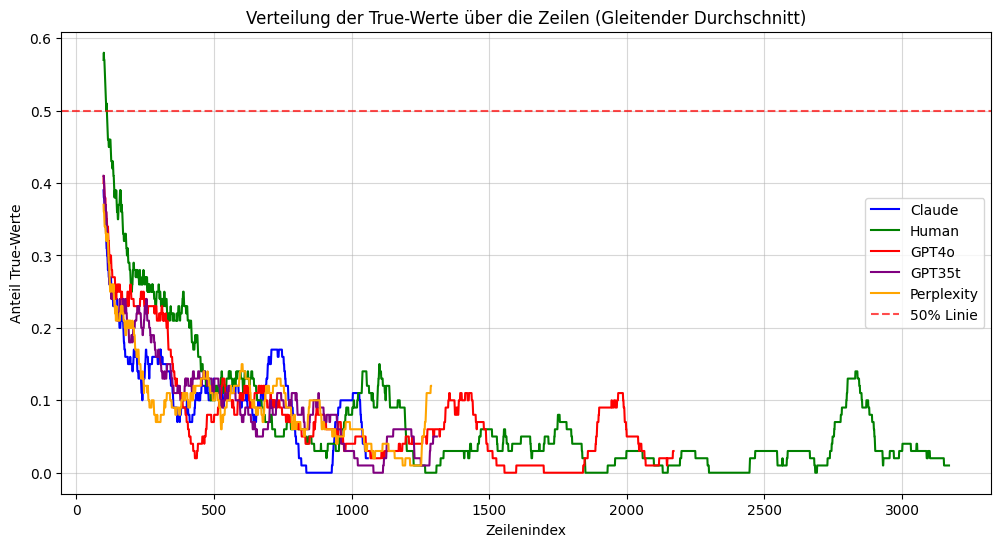

In [211]:
window_size = 100  # Fenstergröße für den gleitenden Durchschnitt
hum_mean = human_df['stop_words'].rolling(window=window_size).mean()
g4o_mean = gpt4o_df['stop_words'].rolling(window=window_size).mean()
g3t_mean = gpt35t_df['stop_words'].rolling(window=window_size).mean()
per_mean = perplexity_df['stop_words'].rolling(window=window_size).mean()
cla_mean = claude_df['stop_words'].rolling(window=window_size).mean()

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(cla_mean, label=f'Claude', color='blue')
plt.plot(hum_mean, label=f'Human', color='green')
plt.plot(g4o_mean, label=f'GPT4o', color='red')
plt.plot(g3t_mean, label=f'GPT35t', color='purple')
plt.plot(per_mean, label=f'Perplexity', color='orange')
plt.xlabel('Zeilenindex')
plt.ylabel('Anteil True-Werte')
plt.title('Verteilung der True-Werte über die Zeilen (Gleitender Durchschnitt)')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='50% Linie')  # Optional, um 50% als Referenz zu markieren
plt.legend()
plt.grid(alpha=0.5)
plt.show()